In [87]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, plot_confusion_matrix
# Import Decision Tree Classifier, PCA decomposition
from sklearn import tree,decomposition
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# Import train_test_split function,GridSearchCV to find the optimal parameters
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
# Import Support Vector Machine Classifier
from sklearn.svm import SVC 
#Import encoder for categorical variable use
from sklearn.preprocessing import LabelEncoder
#Import K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier,Pool
import seaborn as sns
import catboost as cb

In [2]:
loan_train = pd.read_csv("~/Desktop/Fuqua MQM/MQM FALL1/Data Science for Business/Project/newLoan.csv")

In [3]:
loan_test = pd.read_csv("~/Desktop/Fuqua MQM/MQM FALL1/Data Science for Business/Project/newLoan_test.csv")

In [4]:
loan_train.head()

,Income,Age,Experience,Married.Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_owned,House_Ownership_rented
0,5468664,30,2,0,0,Chartered_Accountant,Kanpur,Uttar_Pradesh,2,14,0,0,1
1,362970,50,8,1,0,Economist,Rewa,Madhya_Pradesh,7,11,0,0,1
2,3324933,38,0,0,1,Technical_writer,Panchkula,Haryana,0,11,0,0,1
3,1658354,76,15,0,0,Hotel_Manager,Tiruvottiyur,Tamil_Nadu,14,12,0,0,1
4,3625120,78,2,0,0,Police_officer,Rajahmundry[19][20],Andhra_Pradesh,2,14,0,0,0


In [5]:
loan_test.head()

,Income,Age,Experience,Married.Single,Car_Ownership,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,0,0,0,0,1,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,0,0,0,0,1,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,0,0,0,0,1,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,1,1,0,0,1,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,0,1,0,0,1,Comedian,Berhampore,West Bengal,13,11


In [6]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Income                  50000 non-null  int64 
 1   Age                     50000 non-null  int64 
 2   Experience              50000 non-null  int64 
 3   Married.Single          50000 non-null  int64 
 4   Car_Ownership           50000 non-null  int64 
 5   Profession              50000 non-null  object
 6   CITY                    50000 non-null  object
 7   STATE                   50000 non-null  object
 8   CURRENT_JOB_YRS         50000 non-null  int64 
 9   CURRENT_HOUSE_YRS       50000 non-null  int64 
 10  Risk_Flag               50000 non-null  int64 
 11  House_Ownership_owned   50000 non-null  int64 
 12  House_Ownership_rented  50000 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 5.0+ MB


In [7]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Income                        28000 non-null  int64 
 1   Age                           28000 non-null  int64 
 2   Experience                    28000 non-null  int64 
 3   Married.Single                28000 non-null  int64 
 4   Car_Ownership                 28000 non-null  int64 
 5   House_Ownership_norent_noown  28000 non-null  int64 
 6   House_Ownership_owned         28000 non-null  int64 
 7   House_Ownership_rented        28000 non-null  int64 
 8   Profession                    28000 non-null  object
 9   CITY                          28000 non-null  object
 10  STATE                         28000 non-null  object
 11  CURRENT_JOB_YRS               28000 non-null  int64 
 12  CURRENT_HOUSE_YRS             28000 non-null  int64 
dtypes: int64(10), ob

In [8]:
loan_train.nunique()

Income                    24348
Age                          59
Experience                   21
Married.Single                2
Car_Ownership                 2
Profession                   51
CITY                        317
STATE                        29
CURRENT_JOB_YRS              15
CURRENT_HOUSE_YRS             5
Risk_Flag                     2
House_Ownership_owned         2
House_Ownership_rented        2
dtype: int64

In [9]:
loan_test.nunique()

Income                          9916
Age                               59
Experience                        21
Married.Single                     2
Car_Ownership                      2
House_Ownership_norent_noown       2
House_Ownership_owned              2
House_Ownership_rented             2
Profession                        51
CITY                             317
STATE                             29
CURRENT_JOB_YRS                   15
CURRENT_HOUSE_YRS                  5
dtype: int64

In [10]:
### encode the categorical variables to dummies and numbers
en = LabelEncoder()
categorical_cols = ["CITY", "STATE","Profession"]
for i in categorical_cols:
    loan_train[i] = en.fit_transform(loan_train[i])

In [11]:
# Define train and target
feature_cols= ['Income', 
               'Age',
               'Experience', 
               'Married.Single',
               'Car_Ownership',
               'House_Ownership_owned',
               'House_Ownership_rented',
               'Profession', 
               'CITY',
               'STATE',
               'CURRENT_JOB_YRS',
               'CURRENT_HOUSE_YRS']

In [12]:
prof_32 = en.inverse_transform([i for i in range(0,32)])

print(prof_32)


original_prof = en.inverse_transform(loan_train['Profession'])
print(original_prof)
diff = list(set(original_prof) - set(prof_32))

print(diff)

['Air_traffic_controller' 'Analyst' 'Architect' 'Army_officer' 'Artist'
 'Aviator' 'Biomedical_Engineer' 'Chartered_Accountant' 'Chef'
 'Chemical_engineer' 'Civil_engineer' 'Civil_servant' 'Comedian'
 'Computer_hardware_engineer' 'Computer_operator' 'Consultant' 'Dentist'
 'Design_Engineer' 'Designer' 'Drafter' 'Economist' 'Engineer'
 'Fashion_Designer' 'Financial_Analyst' 'Firefighter' 'Flight_attendant'
 'Geologist' 'Graphic_Designer' 'Hotel_Manager' 'Industrial_Engineer'
 'Lawyer' 'Librarian']
['Chartered_Accountant' 'Economist' 'Technical_writer' ... 'Physician'
 'Biomedical_Engineer' 'Aviator']
['Technical_writer', 'Scientist', 'Police_officer', 'Secretary', 'Mechanical_engineer', 'Technology_specialist', 'Statistician', 'Surveyor', 'Technician', 'Software_Developer', 'Petroleum_Engineer', 'Official', 'Microbiologist', 'Surgeon', 'Magistrate', 'Psychologist', 'Politician', 'Physician', 'Web_designer']


In [60]:
loan_train.head()

,Income,Age,Experience,Married.Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_owned,House_Ownership_rented
0,5468664,30,2,0,0,7,146,25,2,14,0,0,1
1,362970,50,8,1,0,20,251,13,7,11,0,0,1
2,3324933,38,0,0,1,47,223,7,0,11,0,0,1
3,1658354,76,15,0,0,28,300,22,14,12,0,0,1
4,3625120,78,2,0,0,38,242,0,2,14,0,0,0


In [61]:
#split dataset in features and target variable
X = loan_train[feature_cols] # Features
y = loan_train['Risk_Flag']  # Target variable

In [62]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
# 80% training and 20% test

# 1. Decision Tree

In [63]:
## define the parameters used in gridsearch cross validation
dec = DecisionTreeClassifier()
tree_parameters = {'criterion':['gini', 'entropy'],
                   'max_depth':range(3,14)}

In [64]:
## find CV for decision tree
clf_dec = GridSearchCV(estimator = dec,
                        param_grid = tree_parameters,
                        scoring = 'accuracy')

In [65]:
#fit the training data set
clf_dec = clf_dec.fit(X_train, y_train)

In [66]:
### getting the best parameters
clf_dec.best_params_

{'criterion': 'gini', 'max_depth': 13}

In [67]:
## print out the out of sample accuracy in test data
pred_tree = clf_dec.predict(X_test)
print("Out of Sample Accuracy:",metrics.accuracy_score(y_test, pred_tree))
tree_performance = roc_auc_score(y_test, pred_tree)
## print out the area under roc curve
print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

Out of Sample Accuracy: 0.6079
DecisionTree: Area under the ROC curve = 0.6075610148828009


In [68]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62      5055
           1       0.61      0.58      0.59      4945

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



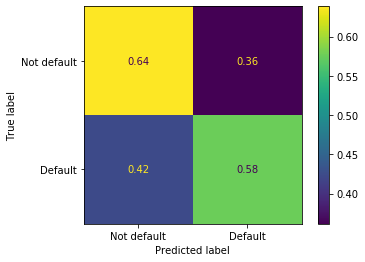

In [69]:
### plot confusion matrix
plot_confusion_matrix(clf_dec,
                      X_test,
                      y_test,   
                      display_labels=['Not default','Default'],
                      normalize='true'                    
                     )

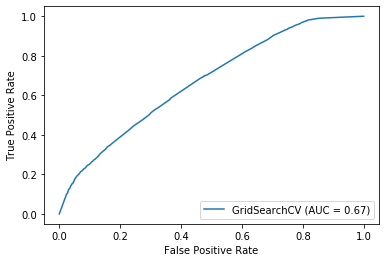

In [70]:
#plot the roc curve
metrics.plot_roc_curve(clf_dec, X_test, y_test) 

In [83]:
## visualize the decision tree
dec_visual = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
dec_visual = dec_visual.fit(X_train, y_train)

#Predict the response for test dataset
dec_pred_visual = dec_visual.predict(X_test)


In [84]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

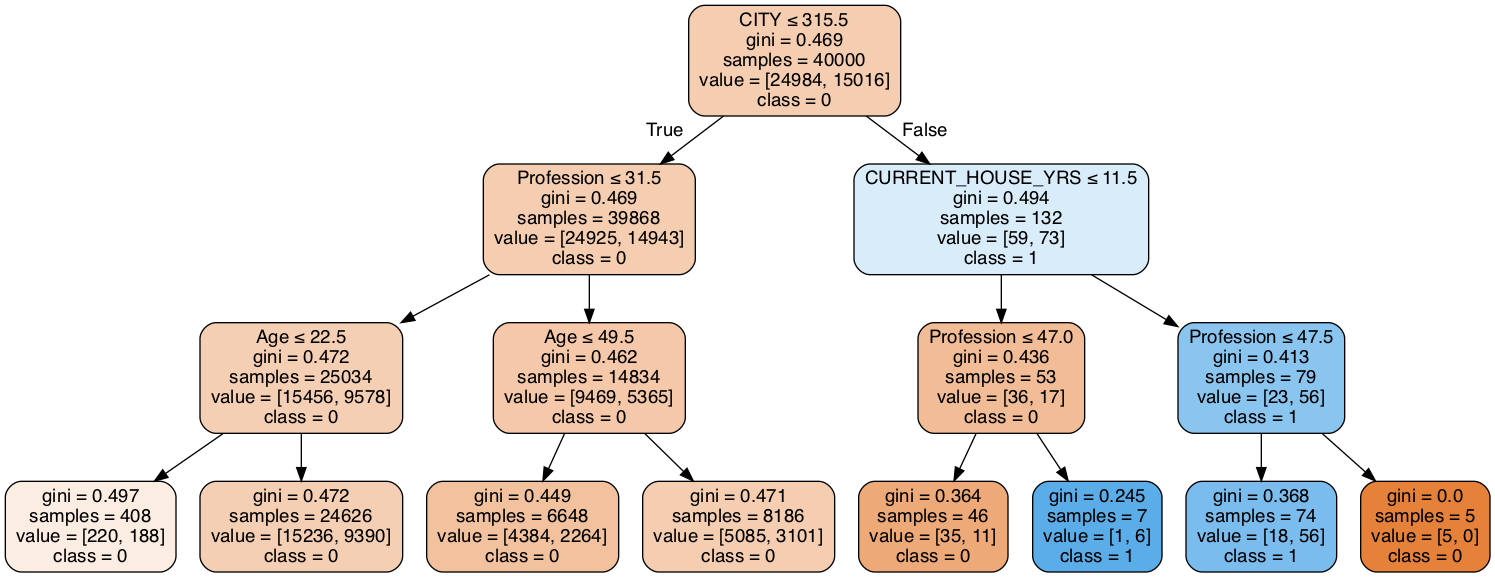

In [85]:
dot_data = StringIO()
export_graphviz(dec_visual, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decisiontree_3.png')
Image(graph.create_png())

## profession <=31.5 means 
## professions which are not in 'Politician', 
#'Surveyor', 'Surgeon', 'Official', 'Scientist', 
# 'Magistrate', 'Mechanical_engineer', 'Police_officer',
#'Software_Developer', 'Statistician', 'Web_designer', 
#'Physician', 'Technical_writer', 'Secretary', 'Technology_specialist',
#'Psychologist', 'Microbiologist', 'Technician', 'Petroleum_Engineer

In [89]:
# K-Fold Cross Validation for decision tree
k = 5
kf = StratifiedKFold(n_splits=k, random_state=None)

model = DecisionTreeClassifier(criterion='gini', max_depth= 13)

acc_score = []
auc_score = []
 
for train_index , test_index in kf.split(X,y):
    
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = metrics.accuracy_score(pred_values,y_test)
    acc_score.append(acc)
    
    auc = roc_auc_score(pred_values , y_test)
    print(auc)
    auc_score.append(auc)
     
avg_acc_score = sum(acc_score)/k
avg_auc_score = sum(auc_score)/k
 

print('Avg accuracy : {}'.format(avg_acc_score))

print('Avg AUC : {}'.format(avg_auc_score))

0.6337826370626545
0.5778365975669477
0.5992560375285693
0.5861843873972559
0.5946864380351918
Avg accuracy : 0.59602
Avg AUC : 0.5983492195181238


# Decision Tree Classification
### How it works:
1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
      - All the tuples belong to the same attribute value.
      - There are no more remaining attributes.
      - There are no more instances.
## PROS:
- Easy to interpret and visualize and the chart mimics the human level thinking.
- Easily capture Non-linear patterns.
- No assumptions needed about distribution.
## CONS:
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree.
- Biased with imbalanced data sets. (Our data set is not balanced, so decision tree may not be a good model for us to use)

# 2. K-NN Classifier

In [90]:
### knn classifier
knn = KNeighborsClassifier()
## setting up parameters
parameters={
    'n_neighbors':[3,5,7,9,11,13],
    'weights':['uniform','distance'],
    'metric':['euclidean']
}

# defining parameter range
grid_knn= GridSearchCV(
    estimator = knn,
    param_grid = parameters,
    scoring = 'accuracy',
    verbose=1,
    cv=3 # 10 cross validation to find best parameters
    )

In [91]:
grid_knn = grid_knn.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    7.5s finished


In [92]:
##print out best k choice for neighbor = 3
print(grid_knn.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')


In [93]:
### predict test data using knn model
pred_knn = grid_knn.predict(X_test)

In [94]:
## print out the out of sample accuracy in test data
print("Out of Sample Accuracy:",metrics.accuracy_score(y_test, pred_knn))
knn_performance = roc_auc_score(pred_knn,y_test)
## print out the area under roc curve
print ('K-NN: Area under the ROC curve = {}'.format(knn_performance))

Out of Sample Accuracy: 0.8491
K-NN: Area under the ROC curve = 0.8582295371711416


In [95]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      4996
           1       0.80      0.93      0.86      5004

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



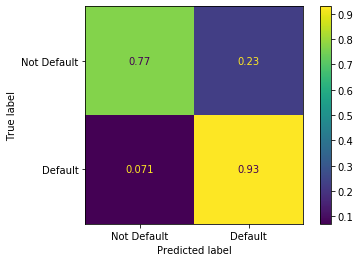

In [96]:
#plot the confusion matrix
plot_confusion_matrix(grid_knn,
                      X_test,
                      y_test,   
                      display_labels=['Not Default','Default'],
                      normalize='true'
                     )

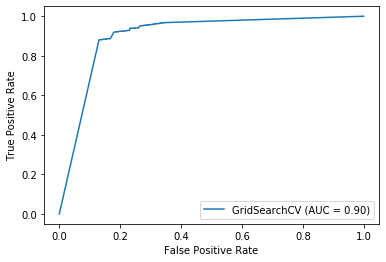

In [97]:
#plot the roc curve
metrics.plot_roc_curve(grid_knn, X_test, y_test) 

In [99]:
# K-Fold Cross Validation for decision tree
k = 5
kf = StratifiedKFold(n_splits=k, random_state=None)

model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

acc_score = []
auc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model = model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = metrics.accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
    auc = roc_auc_score(pred_values , y_test)
    auc_score.append(auc)
    print(auc)
avg_acc_score = sum(acc_score)/k
avg_auc_score = sum(auc_score)/k
 
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
#print('AUC of each fold - {}'.format(auc_score))
print('Avg AUC : {}'.format(avg_auc_score))

0.8624539732681119
0.8594604906281526
0.8611463986661613
0.8599695200957587
0.8582295371711416
Avg accuracy : 0.85074
Avg AUC : 0.8602519839658653


# Choose cat boost encoding data set 
1. OOS accuracy for cat boost encoding data set is 0.853
2. OOS accuracy for normal encoding data set is 0.85
3. We choose the one with higher OOS accuracy


# K-NN Model
- The number of neighbors(K) is the core deciding factor
- But KNN performs better with a lower number of features than a large number of features
- Output value for the object is computed by the average of k closest neighbors value.

## PROS
- can be useful in case of nonlinear data. 
- It can be used with the regression problem. 
- Simpler and faster than other classification methods during training process.
## CONS
- Takes a long time fitting data during testing process
- Requires large memory for storing the entire training dataset for prediction
- not suitable for large dimensional data(Since variable City has 317 different values, KNN will not be a good choice)

Finally, we need to compare accuracy with the null model also.

# Catboost Model

In [100]:
loan_train = pd.read_csv("~/Desktop/Fuqua MQM/MQM FALL1/Data Science for Business/Project/newLoan.csv")

In [107]:
y = loan_train["Risk_Flag"]
X = loan_train.drop("Risk_Flag",axis=1)

In [130]:
categorical = [i for i in range(5,8)]
print(categorical)

[5, 6, 7]


In [131]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [132]:
X_train.head()

,Income,Age,Experience,Married.Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_owned,House_Ownership_rented
20330,7957504,56,2,0,0,Petroleum_Engineer,Nagercoil,Tamil_Nadu,2,10,0,1
17532,4199825,53,19,0,0,Psychologist,Ulhasnagar,Maharashtra,8,13,0,1
45819,2765197,43,13,0,0,Fashion_Designer,Giridih,Jharkhand,5,12,0,1
34807,8361285,37,8,0,0,Engineer,Miryalaguda,Telangana,8,10,0,1
31888,8257045,68,5,0,0,Economist,Rampur,Uttar_Pradesh,5,10,0,1


In [133]:
test_dataset = cb.Pool(X_val,y_val, cat_features=categorical)

In [134]:
catboost_clf = CatBoostClassifier()


catboost_clf = catboost_clf.fit(X_train, y_train, 
        cat_features=categorical, 
        eval_set=(X_val, y_val), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(catboost_clf.is_fitted()))
print('CatBoost model parameters:')
print(catboost_clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [135]:
pred_catboost = catboost_clf.predict(data=X_val)

In [136]:
## print out the out of sample accuracy in test data
print("Out of Sample Accuracy:",metrics.accuracy_score(y_val, pred_catboost))
cb_performance = roc_auc_score(y_val, pred_catboost)
## print out the area under roc curve
print ('DecisionTree: Area under the ROC curve = {}'.format(cb_performance))

Out of Sample Accuracy: 0.9286
DecisionTree: Area under the ROC curve = 0.9286020371440815


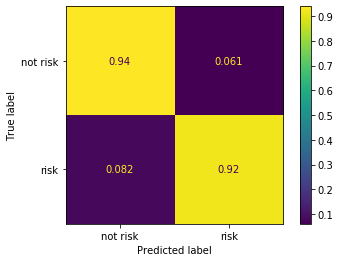

In [137]:
#plot the confusion matrix
plot_confusion_matrix(catboost_clf,
                      X_val,
                      y_val,   
                      display_labels=['not risk','risk'],
                      normalize='true'
                     )

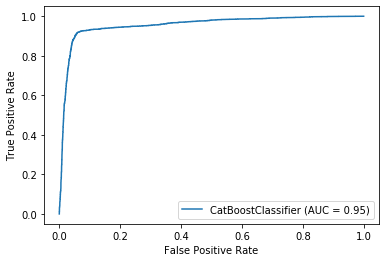

In [138]:
#plot the roc curve
metrics.plot_roc_curve(catboost_clf, X_val, y_val) 

In [139]:
print(classification_report(y_val, pred_catboost))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4999
           1       0.94      0.92      0.93      5001

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [140]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
  

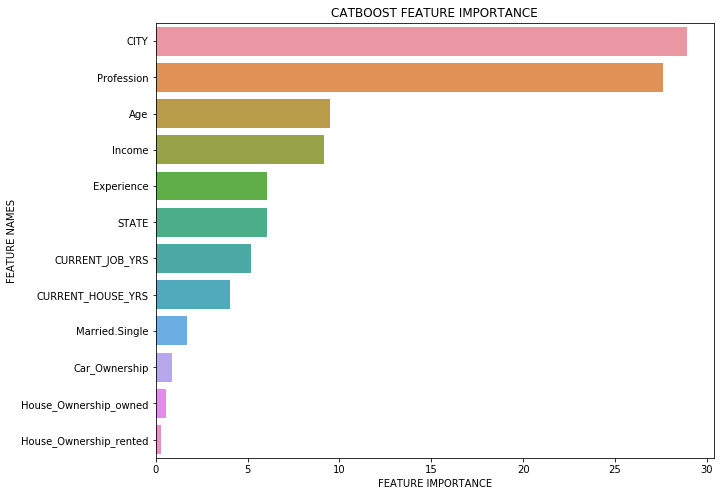

In [141]:
plot_feature_importance(catboost_clf.get_feature_importance(),X_train.columns,'CATBOOST')

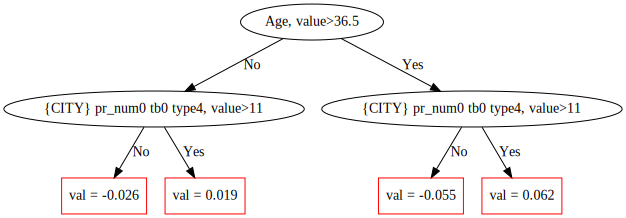

In [142]:
# catboost tree model

pool = Pool(X, y,  cat_features=categorical, feature_names=list(X.columns))
model = CatBoostClassifier(
    max_depth=2, verbose=False, max_ctr_complexity=1, iterations=2).fit(pool)

model.plot_tree(
    tree_idx=0,
    pool=pool
)

# Choose Catboost as final Classification method
- Highest OOS accuracy = 0.92
- Highest AUC
## Catboost uses Minimal Variance Sampling (MVS)
- a weighted sampling version of Stochastic Gradient Boosting
# Pros
- Easy to apply in any computer
- Easy to deal with the categorical variable
- Fast speed
# Cons
- Difficult to interpret the categorical variable with numeric number on the "leaf"
- Hard to graph

In [144]:
k = 5
kf = StratifiedKFold(n_splits=k, random_state=None)

model = CatBoostClassifier()


acc_score = []
auc_score = []
 
for train_index , test_index in kf.split(X,y):
    
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train,
              cat_features=categorical, 
              eval_set=(X_test, y_test), 
              use_best_model=True,
              verbose=False)
    pred_values = model.predict(X_test)
     
    acc = metrics.accuracy_score(pred_values,y_test)
    acc_score.append(acc)
    
    auc = roc_auc_score(pred_values , y_test)
    print(auc)
    auc_score.append(auc)
     
avg_acc_score = sum(acc_score)/k
avg_auc_score = sum(auc_score)/k
 

print('Avg accuracy : {}'.format(avg_acc_score))

print('Avg AUC : {}'.format(avg_auc_score))

0.9295776690962333
0.9244608800448764
0.9279971260572146
0.917829548519169
0.9113071484634607
Avg accuracy : 0.92156
Avg AUC : 0.9222344744361909
